In [113]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from pylab import *

In [135]:
def loss_visualization(config):
    '''
    A simple loss visualization plot
    Losses at each epoch are stored in a text file.
    To use this function without modification:
     - Store all losses in a "data" folder
     - Store all reconstruction losses as "*model*_r_losses299.txt" in the data/recons/ sub-folder
     - Store all reconstruction losses as "*model*_d_losses299.txt" in the data/decoder/ sub-folder
    '''
    path = "./data/" + config + "/*.txt"
    files = glob.glob(path)
    data = [np.loadtxt(file) for file in files]
    
    plt.figure(figsize=(10,8))
    for idx_d, d in enumerate(data):
        label_ = files[idx_d]
        label_ = label_.replace('./data', '')
        label_ = label_.replace(config, '')
        if config == 'recons':
            label_ = label_.replace('_r_losses299.txt', '')
        else:
            label_ = label_.replace('_d_losses299.txt', '')
        
        n = 10
        
        # For easier visualization, plot means of n epochs instead of losses at each epoch 
        y = [sum(d[i:i+n])/n for i in range(0,len(d),n)]
        
        # For better visualization
        if 'simple_RNN' in label_:
            plt.plot(range(0, len(d), n), y, label=label_[2:], color='k', marker='o', linewidth=0.5, alpha=0.5)
        else:
            plt.plot(range(0, len(d), n), y, label=label_[2:])
    
    plt.legend()
    plt.grid(True)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    xlim(1, 300)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

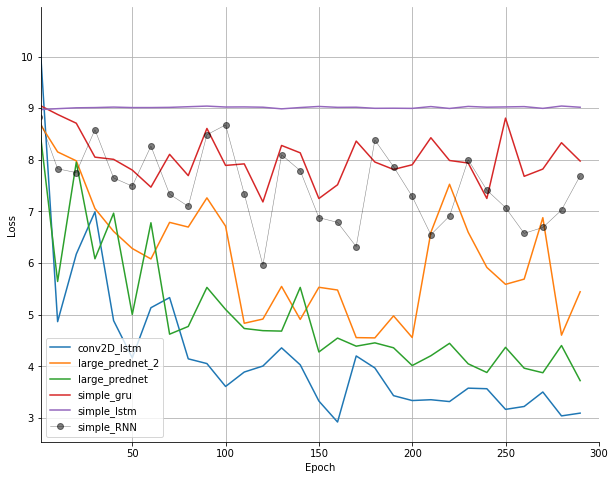

In [137]:
loss_visualization("decoder")